Taller Final Randon Forest Clasification 

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score, ConfusionMatrixDisplay


In [2]:
# Load the data
data = pd.read_csv('creditcard_2023.csv')

# Remove the 'id' column
data = data.drop(columns=['id'])

# Remove duplicates
data = data.drop_duplicates()

# Standardize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the dataset into features and target variable
x_data = data.drop(columns=['Class'])  # Features (all columns except 'Class')
y_data = data['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y)  # We use stratification to maintain the ratio of classes

# Check the shape of the input and target data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(454903, 29) (113726, 29) (454903,) (113726,)


In [3]:
# Initialize a Random Forest classifier with default parameters.
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier with the training data.
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[56843    20]
 [    0 56863]]


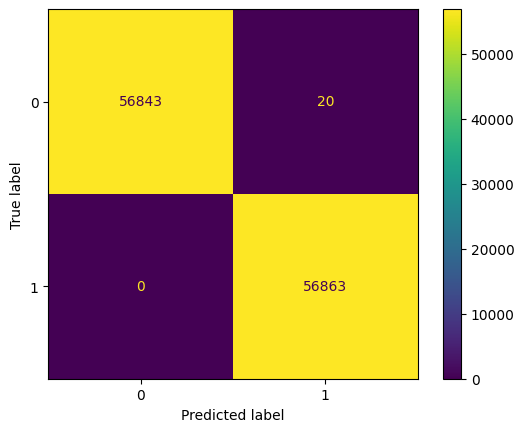


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726


Scores:
Accuracy: 0.9998241387193781
Precision: 0.9996484011040205
Recall: 1.0
F1 Score: 0.9998241696411302
ROC AUC: 0.9998241387193781


In [4]:
#Se predicen las classes usando el DF de test
y_pred = rf_classifier.predict(X_test)

#Se calculan las metricas de evalucacion 
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred)

# Print the performance metrics.
print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()
plt.show()

print("\nClassification Report:")
print(class_report)

print("\nScores:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
print(f"ROC AUC: {roc_auc}")
